In [4]:
import copy
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from dbispipeline.analytics import get_results_as_dataframe
from mediaeval2021.analytics import extract_best_epoch
from mediaeval2021.analytics import extract_best_outcome
from mediaeval2021.analytics import extract_final_outcome
from mediaeval2021.analytics import extract_metrics
from mediaeval2021.analytics import plot_per_label
from mediaeval2021.analytics import print_per_label


results = get_results_as_dataframe(project_name='mediaeval2021', table_name='results')
display(results['outcome'])

0    {'f1_micro': 0.004476629361421988, 'f1_macro':...
1    {'f1_micro': 0.0018452616317385002, 'f1_macro'...
2    {'f1_micro': 0.03482174356627287, 'f1_macro': ...
Name: outcome, dtype: object

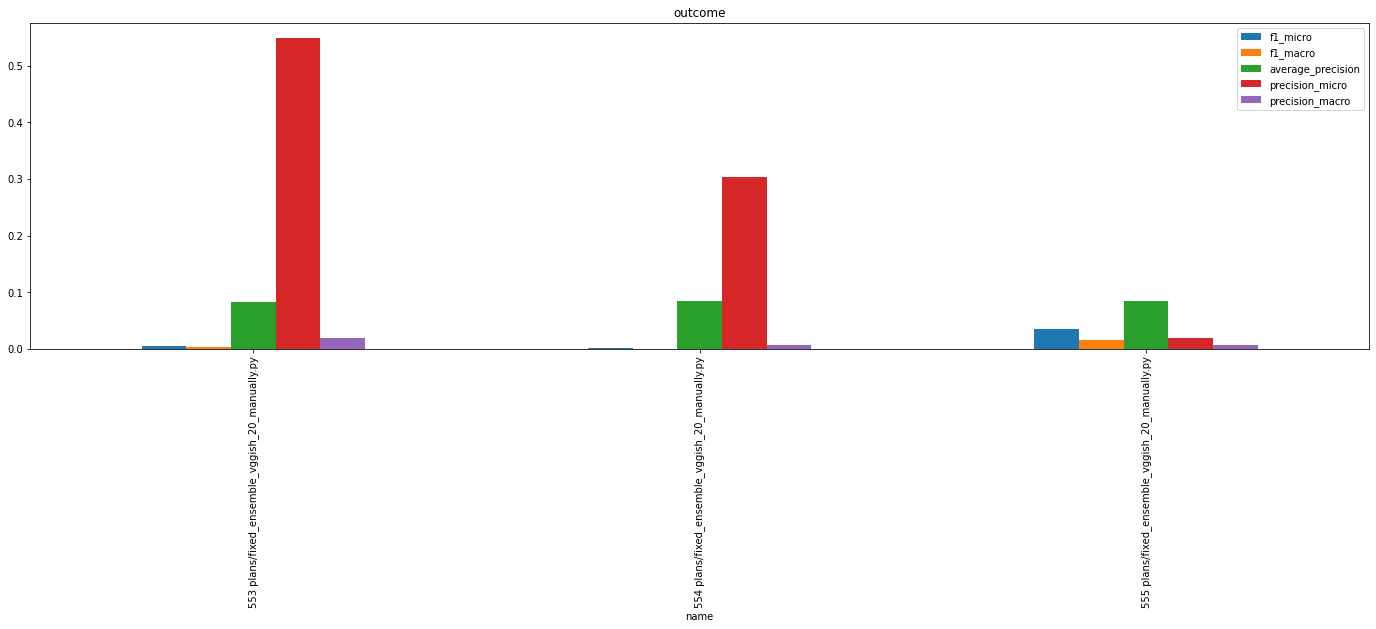

\begin{tabular}{lrrrr}
\toprule
                    name &  roc\_auc &  average\_precision &  f1\_micro &  f1\_macro \\
\midrule
ensemble\_vggish\_manually &    0.678 &              0.083 &     0.004 &     0.003 \\
ensemble\_vggish\_manually &    0.663 &              0.084 &     0.002 &     0.001 \\
ensemble\_vggish\_manually &    0.678 &              0.085 &     0.035 &     0.015 \\
\bottomrule
\end{tabular}



In [5]:
# metric = 'f1_macro'

# results['final_outcome'] = results['outcome'].apply(extract_final_outcome)
# results['best_outcome'] = results['outcome'].apply(lambda v: extract_best_outcome(v, metric=metric))
# results['best_epoch'] = results['outcome'].apply(lambda v: extract_best_epoch(v, metric=metric))

def display_outcome(col):
    outcome = []
    for _, row in results.iterrows():
        out = copy.deepcopy(row[col])
        del out['confusion_matrix']
        del out['average_precision_all']
        del out['roc_auc_all']
        out['id'] = row['id']
        outcome.append(out)

    outcome = pd.DataFrame(outcome).merge(results[['id', 'sourcefile']], on=['id'])
    outcome['name'] = outcome['id'].apply(str) + ' ' + outcome['sourcefile']
    outcome[['name', 'f1_micro', 'f1_macro', 'average_precision', 'precision_micro', 'precision_macro']].plot.bar(x='name', title=col, figsize=(24,6))
    plt.show()

results = results.sort_values(by=['sourcefile'])
# display(results[['id', 'sourcefile', 'best_epoch']])

display_outcome('outcome')
best_outcome = pd.json_normalize(results['outcome'])
best_outcome['name'] = pd.DataFrame(results['id'].apply(str) + ' ' + results['sourcefile']).reset_index()[0]

paper_results = best_outcome[['name', 'roc_auc', 'average_precision', 'f1_micro', 'f1_macro']].round(3)
paper_results['name'] = paper_results['name'].apply(lambda v: v[4:].replace('plans/fixed_', '').replace('sampled_', '').replace('.py', '').replace('_20', '').replace('ensemble_c', 'ec'))
print(paper_results.to_latex(index=False))

/home/andreas/PROJECTS/mediaeval2021/src/mediaeval2021/analytics.py:113: RuntimeWarning: invalid value encountered in long_scalars
  precision_all.append(tp / (tp + fp))


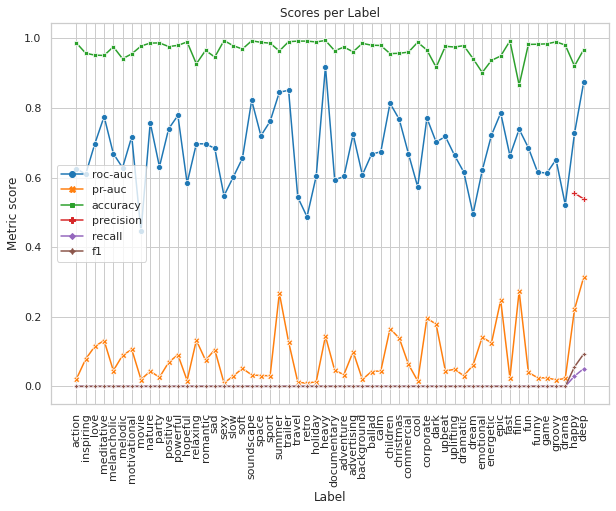

/home/andreas/PROJECTS/mediaeval2021/src/mediaeval2021/analytics.py:113: RuntimeWarning: invalid value encountered in long_scalars
  precision_all.append(tp / (tp + fp))


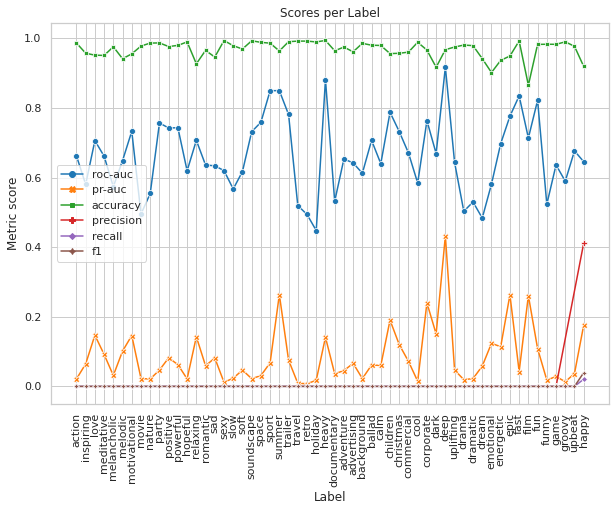

roc-auc      0.663309
pr-auc       0.084032
accuracy     0.968038
precision    0.205882
recall       0.000370
f1           0.000704
dtype: float64

(Index(['action', 'advertising', 'background', 'ballad', 'calm', 'children',
       'christmas', 'commercial', 'cool', 'corporate', 'dark', 'deep',
       'adventure', 'uplifting', 'dramatic', 'dream', 'emotional', 'energetic',
       'epic', 'fast', 'film', 'fun', 'funny', 'game', 'groovy', 'drama',
       'documentary', 'heavy'],
      dtype='object'), Index(['holiday', 'inspiring', 'love', 'meditative', 'melancholic', 'melodic',
       'motivational', 'movie', 'nature', 'party', 'positive', 'powerful',
       'hopeful', 'relaxing', 'romantic', 'sad', 'sexy', 'slow', 'soft',
       'soundscape', 'space', 'sport', 'summer', 'trailer', 'travel', 'retro',
       'upbeat', 'happy'],
      dtype='object'))


In [15]:
metric = 'f1'

data = extract_metrics(results[results['id'] == 553].iloc[0]).sort_values(by=[metric])
print_per_label(data)
plt.show()

data = extract_metrics(results[results['id'] == 554].iloc[0]).sort_values(by=[metric])
print_per_label(data)
plt.show()

display(data.mean())

la = data.sort_values(by=[metric]).index[:28], data.sort_values(by=[metric]).index[28:]
print(la)